<a href="https://colab.research.google.com/github/jungseungoh/Inflearn_Python/blob/main/7_brute_force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 완전탐색 (백트랙킹, 상태트리와 CUT EDGE) , DFS(깊이우선탐색) 기초

### [재귀함수와 스택]
- 스택 프레임 (매개변수/지역변수/복귀주소)

In [ ]:
def DFS(x):
    if x>0:
        #print(x, end=' ')   -> 3 2 1
        DFS(x-1)
        print(x, end=' ')   #-> 1 2 3  스택으로 들어가기 때문에!

if __name__=="__main__":
    n=int(input())
    DFS(n)

3
3 2 1 

### 1. 재귀함수를 이용한 이진수 출력

입력 : 10진수 -> 변환 -> 출력 : 2진수  
(단, 재귀함수 이용해서 출력)


stack  
[ D(11)-5 -> D(5)-5 -> D(2)-5 -> D(1)-5 -> D(0)  
D(0)에서 x==0이므로 수행 종료. 이제 최상단에 있는 함수 마저 실행.  
그 전에 못했던 일 수행 (=백트랙킹)

In [ ]:
def DFS(x):
    if x==0:
        return
    else:
        DFS(x//2)
        print(x%2, end='')


if __name__ == "__main__":
    n=int(input())
    DFS(n)

11
1011

### 2. 이진트리 순회 (DFS:깊이우선탐색)

전위순회 & 후위순회 연습하기

- 전위순회 : 부모 -> 왼쪽 -> 오른쪽  
- 중위순회 : 왼쪽 -> 부모 -> 오른쪽
- 후위순회 : 왼쪽 -> 오른쪽 -> 부모

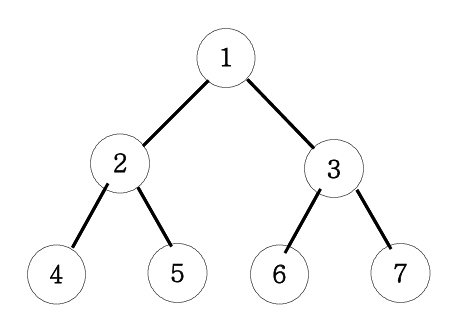

In [ ]:
# 깊이우선탐색 초보자 구조 : if ~ else구문
def DFS(v):
    if v>7:
        return  #함수종료
    else:
        #print(v, end=' ') # 전위순회 -> 순회방식 대표!
        DFS(v*2)   #왼쪽 노드
        #print(v, end=' ') # 중위순회 -> 거의 안쓰임.
        DFS(v*2+1) #오른쪽 노드
        print(v, end=' ') # 후위순회 -> 병합정렬이 대표적!


if __name__ == "__main__":
     DFS(1)

4 5 2 6 7 3 1 

### 3. 부분집합 구하기 (DFS:깊이우선탐색)

자연수 N 주어지면, 1 ~ N까지의 원소를 갖는 집합의 부분집합 모두 출력.

* DFS 잘할려면 상태트리 구성을 잘해야한다.

In [ ]:
def DFS(v):
    if v==n+1:
        for i in range(1, n+1):
            if ch[i]==1:
                print(i, end=' ')
        print() # 줄바꿈
    else:
        ch[v]=1
        DFS(v+1)
        ch[v]=0
        DFS(v+1)

if __name__ == '__main__':
    n=int(input())
    ch=[0]*(n+1)
    DFS(1)

3
1 2 3 
1 2 
1 3 
1 
2 3 
2 
3 



### 4. 합이 같은 부분집합 (DFS:깊이우선탐색)

두 개의 부분집합으로 나누었을 때, 원소의 합이 서로 같으면 YES, 아니면 NO 출력.

In [ ]:
import sys

def DFS(L, sum):  # L : 인덱스번호 sum : 내가 만든 부분집합의 합
    if sum > total//2:
        return  # 만든 부분집합의 합이 총합의 반절을 넘어버리면 굳이 할 필요 없어. 함수종료
    if L==n:
        if sum==(total-sum):
            print("YES")
            sys.exit(0)
    else:
        DFS(L+1, sum+a[L]) # 사용하는 경우
        DFS(L+1, sum)      # 사용안하는 경우


if __name__ =="__main__":
    n=int(input())
    a=list(map(int, input().split()))
    total=sum(a)
    DFS(0, 0)
    print("NO")

6
1 3 5 6 7 10
YES


SystemExit: 0

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### [전역변수 & 지역변수]


In [ ]:
def DFS1():
    cnt=3 #지역변수   (지역변수가 우선)
    print(cnt)

def DFS2():
    global cnt    # 지역변수로 언어번역이 되지 않게 하기 위해서 글로벌 사용!
    if cnt==5:
        cnt+=1    # cnt = 이러면 지역변수가 된다!
        print(cnt)

if __name__=="__main__":
    cnt=5 #전역변수 선언   전역변수는 모든 함수가 접근 가능!
    DFS1()
    DFS2()
    print(cnt)

3
6
6


### 5. 바둑이 승차 (DFS:깊이우선탐색)

C kg 넘으면 트럭에 태울 수가 없다. C를 넘지 않으면서 가장 무겁게 태우고 싶다.  
N마리의 바둑이와 각 바둑이의 무게 W가 주어지면, 태울 수 있는 가장 무거운 무게 구하시오.

In [ ]:
def DFS(L, sum, tsum):
    global res
    if sum+(total-tsum) < res:  # 가지치기 (cut-edge)
        return
    if sum > c:
        return
    if L==n:
        if sum > res:
            res=sum
    else:
        DFS(L+1, sum+a[L], tsum+a[L])  # tsum+a[L] : 부분집합을 만든다 안만든다 상관없이 판단한 무게
        DFS(L+1, sum, tsum+a[L])

if __name__ == "__main__":
    c, n = map(int, input().split())  # c : 무게제한 n : 바둑이 마리 수
    a = [0]*n
    res=-2147000000
    for i in range(n):
        a[i]=int(input())
    total=sum(a)
    DFS(0,0,0)
    print(res)

259 5
81
58
42
33
61
242


### 6. 중복순열 구하기

1 ~ N까지 번호가 적힌 구슬이 있습니다. 이 중 <b>중복</b>을 허락하여 M번을 뽑아 일렬로 나열하는 방법을 모두 출력하시오.
- 출력순서 : 오름차순

In [ ]:
def DFS(L):
    global cnt
    if L==m:
        for j in range(m):
            print(res[j], end=' ')
        print()
        cnt+=1
    else:
        for i in range(1, n+1):
            res[L]=i
            DFS(L+1)

if __name__=="__main__":
    n,m = map(int, input().split())
    res=[0]*m
    cnt=0
    DFS(0)
    print(cnt)

3 2
1 1 
1 2 
1 3 
2 1 
2 2 
2 3 
3 1 
3 2 
3 3 
9


### 7. 동전 교환

여러 단위의 동전들이 있을 때, 거스름돈을 가장 적은 수의 동전으로 교환해주려면 어떻게 주면 되는가? (각 단위의 동전은 무한정 쓸 수 있다.)
- 각 동전의 종류는 100원을 넘지 않는다.

DFS 사용해가지고 모든 부분집합을 구하고 sum==m 의 부분집합 개수 출력

In [ ]:
def DFS(L, sum):  # Lv이 곧 동전의 사용 개수
    global res
    if L > res:  # 최소 레벨이 결정되었는데 더 내려가서 찾아도 의미가 없다.
        return
    if sum > m:
        return
    if sum==m:
        if L < res:
            res=L
    else:
        for i in range(n):
            DFS(L+1, sum+a[i])


if __name__=="__main__":
    n=int(input())
    a=list(map(int, input().split()))
    m=int(input())
    res=2147000000
    a.sort(reverse=True) # 최소 개수로 구해야 하니 큰 동전으로 가는게 낫다.
    DFS(0,0)
    print(res)

3
1 2 5
15
3


### 8. 순열 구하기

1 ~ N까지의 구슬이 있습니다. 이 중에서 M개를 뽑아 일렬로 나열하는 방법 모두 출력하시오.
- 출력순서는 오름차순으로 출력.

In [ ]:
def DFS(L):
    global cnt
    if L==m:
        for j in range(L):
            print(res[j], end=' ')
        print()
        cnt+=1
    else:
        for i in range(1, n+1):
            if ch[i]==0:
                ch[i]=1
                res[L]=i
                DFS(L+1)  # 기준
                ch[i]=0   # 기준 아래는 백하고 되돌아온다.

if __name__=="__main__":
    n,m = map(int, input().split())
    res=[0]*m
    ch=[0]*(n+1)  # 중복 방지를 위한 체크리스트
    cnt=0
    DFS(0)
    print(cnt)

3 2
1 2 
1 3 
2 1 
2 3 
3 1 
3 2 
6


### 9. 수열 추측하기 (순열 / 파스칼 응용)

In [ ]:
import sys
def DFS(L, sum):
    if L==n and sum==f:
        for x in p:
            print(x, end=' ')
        sys.exit(0)
    else:
        for i in range(1, n+1):
            if ch[i]==0:
                ch[i]=1
                p[L]=i
                DFS(L+1, sum+(p[L]*b[L]))
                ch[i]=0

if __name__ == "__main__":
    n, f = map(int, input().split())
    p=[0]*n #순열
    b=[1]*n #이항계수
    ch=[0]*(n+1) # 중복 방지
    for i in range(1, n):
        b[i]=b[i-1]*(n-i)//i
    DFS(0,0)

4 16
3 1 2 4 

SystemExit: 0

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


###9-1.수열 추측하기 (라이브러리 이용한 버전)

In [ ]:
import itertools as it  # 순열 or 조합을 자동으로 구해줌
n, f = map(int, input().split())
b=[1]*n
for i in range(1, n):
    b[i]=b[i-1]*(n-i)/i
a=list(range(1,n+1))
for tmp in it.permutations(a):  # 순열
    sum=0
    for L, x in enumerate(tmp):
        sum+=(x*b[L])
    if sum==f:
        for x in tmp:
            print(x, end=' ')
        break

4 16
3 1 2 4 

### 10. 조합 구하기 (DFS)

1 ~ N까지 구슬이 있습니다. 이 중에서 M개를 뽑는 방법의 수를 출력하시오

In [ ]:
def DFS(L, s):
    global cnt
    if L==m:
        for j in range(L):
            print(res[j], end=' ')
        cnt+=1
        print()
    else:
        for i in range(s, n+1):
            res[L]=i
            DFS(L+1, i+1)

if __name__ == "__main__":
    n, m = map(int,input().split())
    res = [0]*(n+1)
    cnt = 0
    DFS(0,1)
    print(cnt)

4 2
1 2 
1 3 
1 4 
2 3 
2 4 
3 4 
6


### 11. 수들의 조합 (DFS)

N개의 정수 중에서 K개를 뽑는 조합의 합이 임의의 정수 M의 배수인 개수는 몇 개인지 출력하시오.

ex) 2 4 5 8 12 -> 3개 뽑은 조합의 합 : 6 -> 6의 배수인 조합 찾으면 4,8,12  / 2,4,12 : 2가지

In [ ]:
def DFS(L, s, sum):
    global cnt
    if L==k:
        if sum%m==0:
            cnt+=1
    else:
        for i in range(s, n):
            DFS(L+1, i+1, sum+a[i])

if __name__ == "__main__":
    n, k = map(int,input().split())
    a = list(map(int, input().split())) # 0 ~ n-1까지 들어있다.
    m = int(input())
    cnt=0
    DFS(0,0,0)
    print(cnt)

5 3
2 4 5 8 12
6
2


###11-1.수들의 조합 (라이브러리 이용한 버전)

In [2]:
import itertools as it
n, k = map(int, input().split())
a=list(map(int, input().split()))
m=int(input())
cnt=0
for x in it.combinations(a,k):  # 조합
    if sum(x)%m==0:
        cnt+=1
print(cnt)


5 3
2 4 5 8 12
6
2


### 14. 인접행렬 (가중치 방향그래프)

노드와 간선의 집합  = 그래프  
간선에 "방향"과 "값"이 있으면  = 가중치 방향 그래프  
무방향 / 방향 / 가중치 방향


In [3]:
n, m = map(int, input().split())
g =[[0]*(n+1) for _ in range(n+1)]
for i in range(m):
    a,b,c=map(int, input().split())
    g[a][b]=c

for i in range(1,n+1):
    for j in range(1,n+1):
        print(g[i][j], end=' ')
    print()

6 9
1 2 7
1 3 4
2 1 2
2 3 5
2 5 5
3 4 5
4 2 2
4 5 5
6 4 5
0 7 4 0 0 0 
2 0 5 0 5 0 
0 0 0 5 0 0 
0 2 0 0 5 0 
0 0 0 0 0 0 
0 0 0 5 0 0 


### 15. 경로탐색 (그래프 DFS)

1번 정점에서 N번 정점으로 가는 모든 경로의 가짓 수 출력  
(한번 방문한 노드는 다시 방문 금지)

In [5]:
def DFS(v): #노드번호
    global cnt
    if v==n:
        cnt+=1
        for x in path:
            print(x, end=' ')
        print()
    else:
        for i in range(1, n+1):
            if g[v][i]==1 and ch[i]==0:
                ch[i]=1
                path.append(i)
                DFS(i)
                path.pop()
                ch[i]=0  #롤백하는지점

if __name__=="__main__":
    n, m = map(int, input().split())
    g =[[0]*(n+1) for _ in range(n+1)]
    ch=[0]*(n+1)
    for i in range(m):
        a, b = map(int, input().split())
        g[a][b]=1
    cnt=0
    path=[]
    path.append(1)
    ch[1]=1
    DFS(1)
    print(cnt)

5 9
1 2
1 3
1 4
2 1
2 3
2 5
3 4
4 2
4 5
1 2 3 4 5 
1 2 5 
1 3 4 2 5 
1 3 4 5 
1 4 2 5 
1 4 5 
6
